# Activity: work with the iris dataset

# Importing libraries

In [82]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/MyDrive/SemanaTecHerramientasComputacionales/NotebooksProfessor/"

else:
    # Define path del proyecto
    Ruta            = ""


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [141]:
#Añadimosel nombre de cada uno de los renglones que tendra
colnames=["Sepal_Length","Sepal_Width","Petal_Length","Petal_Width","Flower_Name"]

# Dataset url
url = Ruta + "datasets/iris/iris.csv"

# Load the dataset
df = pd.read_csv(url,header=None, names=colnames)
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower_Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [85]:
# get the number of observations and variables
df.shape

(150, 5)

In [163]:
# Drop rows with NaN values if existing
df.dropna()
df.drop("Flower_Name", axis=1, inplace = True)

# Print the new shape
print(df.shape)

(150, 6)


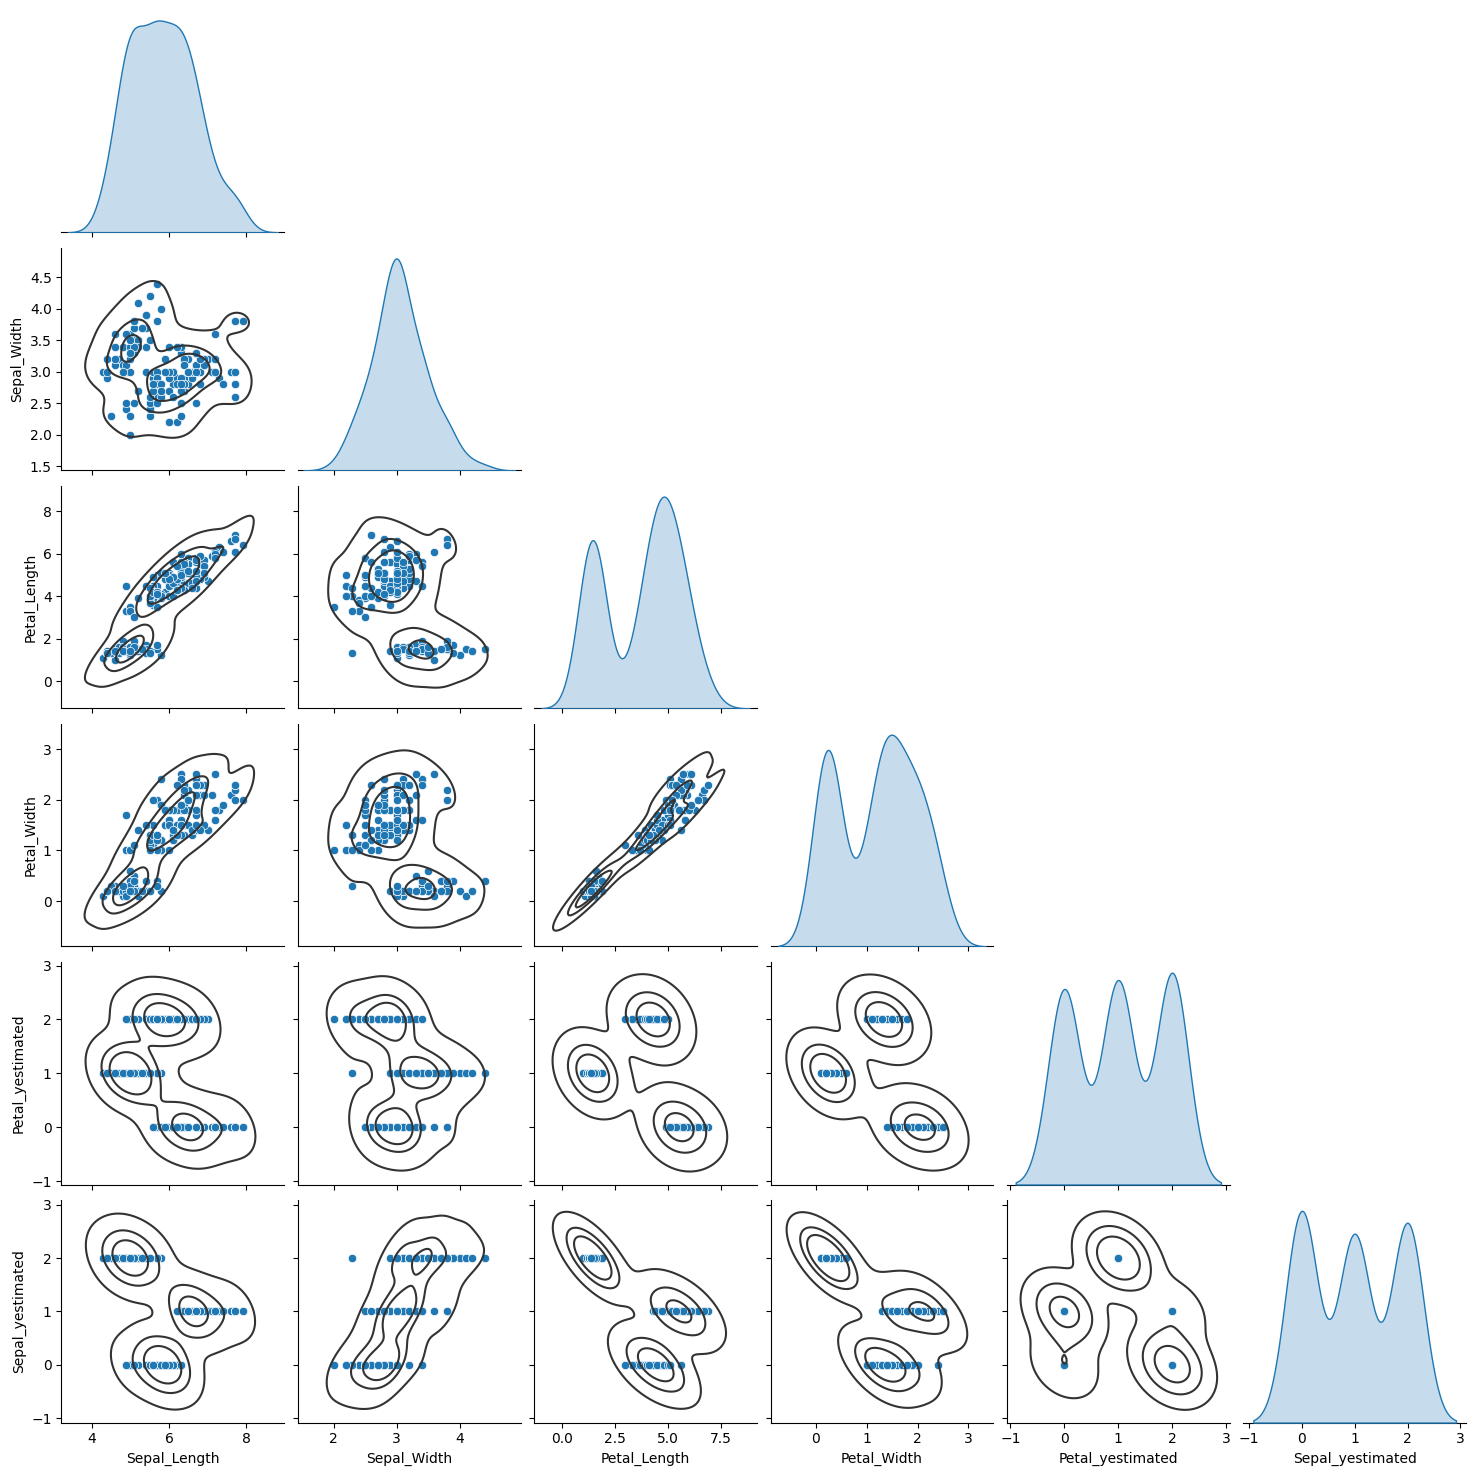

In [164]:
# Pairplot: Scatterplot of all variables
g = sns.pairplot(df, corner =True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

In [165]:
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Petal_yestimated,Sepal_yestimated
0,5.1,3.5,1.4,0.2,1,2
1,4.9,3.0,1.4,0.2,1,2
2,4.7,3.2,1.3,0.2,1,2
3,4.6,3.1,1.5,0.2,1,2
4,5.0,3.6,1.4,0.2,1,2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,1
146,6.3,2.5,5.0,1.9,0,0
147,6.5,3.0,5.2,2.0,0,1
148,6.2,3.4,5.4,2.3,0,1


##1. Do clustering with the iris flower dataset to form clusters using as features the four features

In [166]:
from re import S
# Import sklearn KMeans
from sklearn.cluster import KMeans
# Define number of clusters
K  = 3 # Let's assume there are 2 clusters/groups

# Create/Initialize the Kmeans box/object
km = KMeans(n_clusters=K, n_init="auto")
kmP = KMeans(n_clusters=K, n_init="auto")
kmS = KMeans(n_clusters=K, n_init="auto")


In [167]:
# Do K-means clustering (assing each point in the dataset to a cluster)
Pyestimated = kmP.fit_predict(df[['Petal_Length','Petal_Width']])
print(Pyestimated)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]


In [168]:
# Do K-means clustering (assing each point in the dataset to a cluster)
Syestimated = kmS.fit_predict(df[['Sepal_Length','Sepal_Width']])
print(Syestimated)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [169]:
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Petal_yestimated,Sepal_yestimated
0,5.1,3.5,1.4,0.2,1,2
1,4.9,3.0,1.4,0.2,1,2
2,4.7,3.2,1.3,0.2,1,2
3,4.6,3.1,1.5,0.2,1,2
4,5.0,3.6,1.4,0.2,1,2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,1
146,6.3,2.5,5.0,1.9,0,0
147,6.5,3.0,5.2,2.0,0,1
148,6.2,3.4,5.4,2.3,0,1


In [170]:
# Add a new column to the dataset with the cluster information
df['Petal_yestimated'] = Pyestimated
df['Sepal_yestimated'] = Syestimated
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Petal_yestimated,Sepal_yestimated
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1,2
146,6.3,2.5,5.0,1.9,1,0
147,6.5,3.0,5.2,2.0,1,2
148,6.2,3.4,5.4,2.3,1,2


In [171]:
# Get a dataframe with the data of each clsuter
df0p = df[df.Petal_yestimated==0]
df1p = df[df.Petal_yestimated==1]
df2p = df[df.Petal_yestimated==2]


# Number of points in cluster 0
NpointsCluster0p = df0p.shape[0]
NpointsCluster1p = df1p.shape[0]
NpointsCluster2p = df2p.shape[0]


# Print
print("Number of points in clusters 0: " + str(NpointsCluster0p) )
print("Number of points in clusters 1: " + str(NpointsCluster1p) )
print("Number of points in clusters 2: " + str(NpointsCluster2p) )

# Print total number of points
print("Total Number of points in the clusters: " + str(NpointsCluster0p+NpointsCluster1p+NpointsCluster2p) )



Number of points in clusters 0: 50
Number of points in clusters 1: 48
Number of points in clusters 2: 52
Total Number of points in the clusters: 150


In [173]:
# Get a dataframe with the data of each clsuter
df0s = df[df.Sepal_yestimated==0]
df1s = df[df.Sepal_yestimated==1]
df2s = df[df.Sepal_yestimated==2]


# Number of points in cluster 0
NpointsCluster0s = df0s.shape[0]
NpointsCluster1s = df1s.shape[0]
NpointsCluster2s = df2s.shape[0]


# Print
print("Number of points in clusters 0: " + str(NpointsCluster0s) )
print("Number of points in clusters 1: " + str(NpointsCluster1s) )
print("Number of points in clusters 2: " + str(NpointsCluster2s) )

# Print total number of points
print("Total Number of points in the clusters: " + str(NpointsCluster0s+NpointsCluster1s+NpointsCluster2s) )

Number of points in clusters 0: 53
Number of points in clusters 1: 50
Number of points in clusters 2: 47
Total Number of points in the clusters: 150


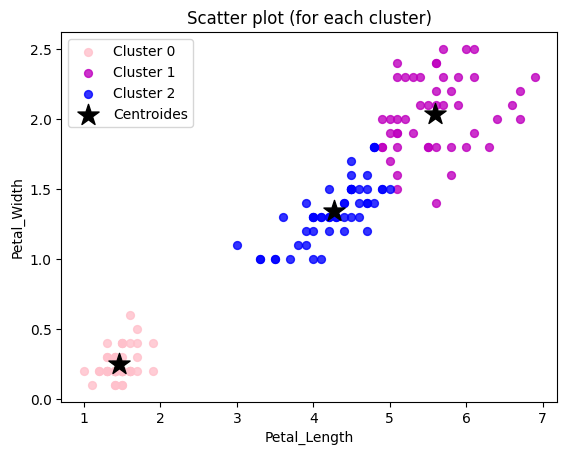

In [176]:
# Get a dataframe with the data of each clsuter
df1p = df[df.Petal_yestimated==0]
df2p = df[df.Petal_yestimated==1]
df3p = df[df.Petal_yestimated==2]

# Scatter plot of each cluster
plt.scatter(df1p.Petal_Length	, df1p.Petal_Width	, label='Cluster 0', c='pink', marker='o', s=32, alpha=0.8)
plt.scatter(df2p.Petal_Length	, df2p.Petal_Width	, label='Cluster 1', c='m', marker='o', s=32, alpha=0.8)
plt.scatter(df3p.Petal_Length	, df3p.Petal_Width	, label='Cluster 2', c='b', marker='o', s=32, alpha=0.8)

# Plot centrodides
plt.scatter(kmP.cluster_centers_[:,0], kmP.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)


plt.title('Scatter plot (for each cluster)')
plt.xlabel('Petal_Length')
plt.ylabel('Petal_Width')
plt.legend()
plt.show()


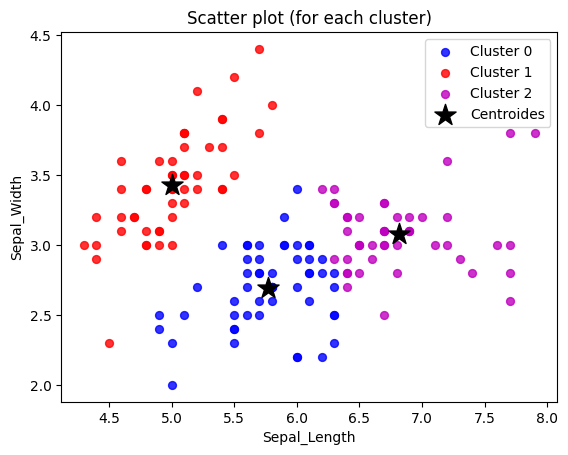

In [179]:
# Get a dataframe with the data of each clsuter
df1s = df[df.Sepal_yestimated==0]
df2s = df[df.Sepal_yestimated==1]
df3s = df[df.Sepal_yestimated==2]

# Scatter plot of each cluster
plt.scatter(df1s.Sepal_Length	, df1s.Sepal_Width	, label='Cluster 0', c='b', marker='o', s=32, alpha=0.8)
plt.scatter(df2s.Sepal_Length	, df2s.Sepal_Width	, label='Cluster 1', c='r', marker='o', s=32, alpha=0.8)
plt.scatter(df3s.Sepal_Length	, df3s.Sepal_Width	, label='Cluster 2', c='m', marker='o', s=32, alpha=0.8)

# Plot centrodides
plt.scatter(kmS.cluster_centers_[:,0], kmS.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('Sepal_Length')
plt.ylabel('Sepal_Width')
plt.legend()
plt.show()

##2. Do clustering with the iris flower dataset to form clusters using as features the two petal measurements: Drop out the other two features

In [180]:
# Do K-means clustering (assing each point in the dataset to a cluster)
Pyestimated = km.fit_predict(df[['Petal_Length','Petal_Width']])
Pyestimated

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [181]:
# Add a new column to the dataset with the cluster information
df['Petal_yestimated'] = Pyestimated
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Petal_yestimated,Sepal_yestimated
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [182]:
# Get a dataframe with the data of each clsuter
df0p = df[df.Petal_yestimated==0]
df1p = df[df.Petal_yestimated==1]
df2p = df[df.Petal_yestimated==2]


# Number of points in cluster 0
NpointsCluster0p = df0p.shape[0]
NpointsCluster1p = df1p.shape[0]
NpointsCluster2p = df2p.shape[0]


# Print
print("Number of points in clusters 0: " + str(NpointsCluster0p) )
print("Number of points in clusters 1: " + str(NpointsCluster1p) )
print("Number of points in clusters 2: " + str(NpointsCluster2p) )

# Print total number of points
print("Total Number of points in the clusters: " + str(NpointsCluster0p+NpointsCluster1p+NpointsCluster2p) )

Number of points in clusters 0: 52
Number of points in clusters 1: 50
Number of points in clusters 2: 48
Total Number of points in the clusters: 150


In [183]:
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Petal_yestimated,Sepal_yestimated
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


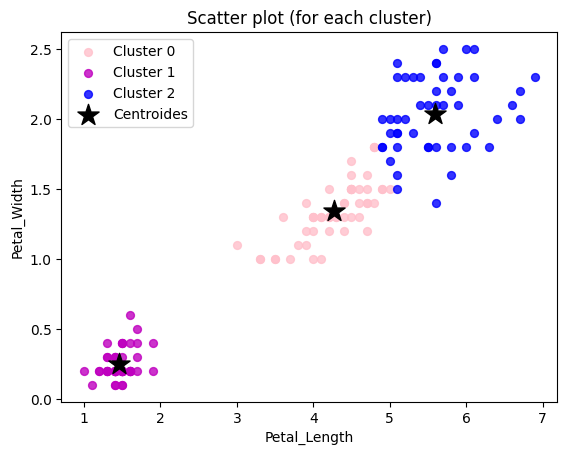

In [184]:
# Get a dataframe with the data of each clsuter
df1p = df[df.Petal_yestimated==0]
df2p = df[df.Petal_yestimated==1]
df3p = df[df.Petal_yestimated==2]

# Scatter plot of each cluster
plt.scatter(df1p.Petal_Length	, df1p.Petal_Width	, label='Cluster 0', c='pink', marker='o', s=32, alpha=0.8)
plt.scatter(df2p.Petal_Length	, df2p.Petal_Width	, label='Cluster 1', c='m', marker='o', s=32, alpha=0.8)
plt.scatter(df3p.Petal_Length	, df3p.Petal_Width	, label='Cluster 2', c='b', marker='o', s=32, alpha=0.8)

# Plot centrodides
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('Petal_Length')
plt.ylabel('Petal_Width')
plt.legend()
plt.show()

##3. Do clustering with the iris flower dataset to form clusters using as features the two sepal measurements: Drop out the other two features

In [185]:
# Do K-means clustering (assing each point in the dataset to a cluster)
Syestimated = km.fit_predict(df[['Sepal_Length','Sepal_Width']])
Syestimated

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [186]:
# Add a new column to the dataset with the cluster information
df['Sepal_yestimated'] = Pyestimated
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Petal_yestimated,Sepal_yestimated
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [187]:
# Print the Labels/Names of the existing clusters
df.Sepal_yestimated.unique()

array([1, 0, 2], dtype=int32)

In [188]:
# Cluster centroides
km.cluster_centers_

array([[6.82391304, 3.07826087],
       [5.00392157, 3.40980392],
       [5.8       , 2.7       ]])

In [189]:
# Sum of squared error (sse) of the final model
km.inertia_

37.08627024722932

In [190]:
# The number of iterations required to converge
km.n_iter_

11

In [191]:
# Get a dataframe with the data of each clsuter
df0s = df[df.Sepal_yestimated==0]
df1s = df[df.Sepal_yestimated==1]
df2s = df[df.Sepal_yestimated==2]


# Number of points in cluster 0
NpointsCluster0s = df0s.shape[0]
NpointsCluster1s = df1s.shape[0]
NpointsCluster2s = df2s.shape[0]


# Print
print("Number of points in clusters 0: " + str(NpointsCluster0s) )
print("Number of points in clusters 1: " + str(NpointsCluster1s) )
print("Number of points in clusters 2: " + str(NpointsCluster2s) )

# Print total number of points
print("Total Number of points in the clusters: " + str(NpointsCluster0s+NpointsCluster1s+NpointsCluster2s) )

Number of points in clusters 0: 52
Number of points in clusters 1: 50
Number of points in clusters 2: 48
Total Number of points in the clusters: 150


In [192]:
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Petal_yestimated,Sepal_yestimated
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


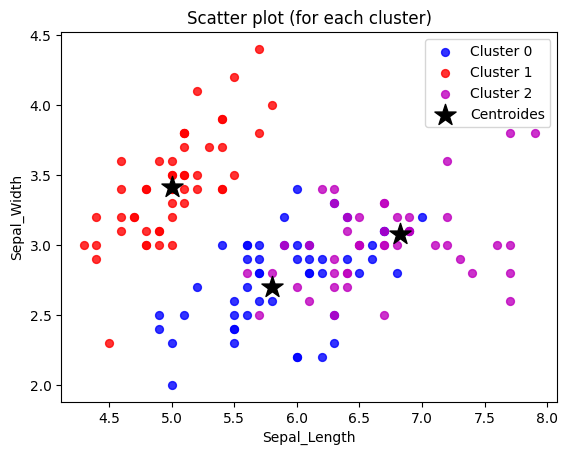

In [193]:
# Get a dataframe with the data of each clsuter
df1s = df[df.Sepal_yestimated==0]
df2s = df[df.Sepal_yestimated==1]
df3s = df[df.Sepal_yestimated==2]

# Scatter plot of each cluster
plt.scatter(df1s.Sepal_Length	, df1s.Sepal_Width	, label='Cluster 0', c='b', marker='o', s=32, alpha=0.8)
plt.scatter(df2s.Sepal_Length	, df2s.Sepal_Width	, label='Cluster 1', c='r', marker='o', s=32, alpha=0.8)
plt.scatter(df3s.Sepal_Length	, df3s.Sepal_Width	, label='Cluster 2', c='m', marker='o', s=32, alpha=0.8)

# Plot centrodides
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('Sepal_Length')
plt.ylabel('Sepal_Width')
plt.legend()
plt.show()

##4. Which one provides the better grouping? Solve this using programming skills, e.g., compute performance metrics

Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [200]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(df[['Sepal_Length','Sepal_Width']])
    # Save sse for each k
    sse.append(km.inertia_)

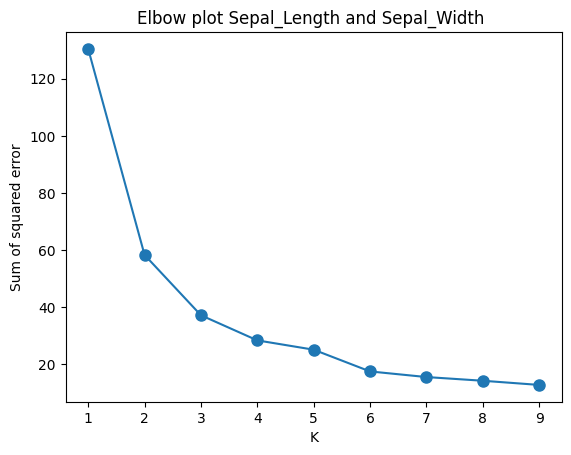

In [201]:
# Plot sse versus k
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Elbow plot Sepal_Length and Sepal_Width ')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

In [202]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(df[['Petal_Length','Petal_Width']])
    # Save sse for each k
    sse.append(km.inertia_)

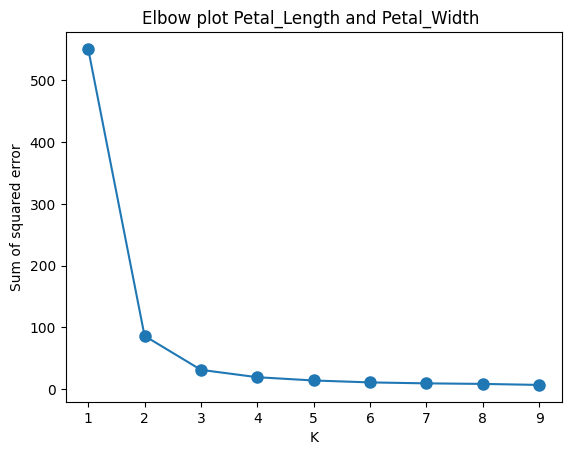

In [203]:
# Plot sse versus k
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Elbow plot Petal_Length and Petal_Width ')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

Podemos observar que la que da una mejor agrupacion es la de Sepal_Length and Sepal_Width esto por como los datos estan mas juntos y en las graficas se observa como no hay un gran cambio del dato mas alto al mas bajo